In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

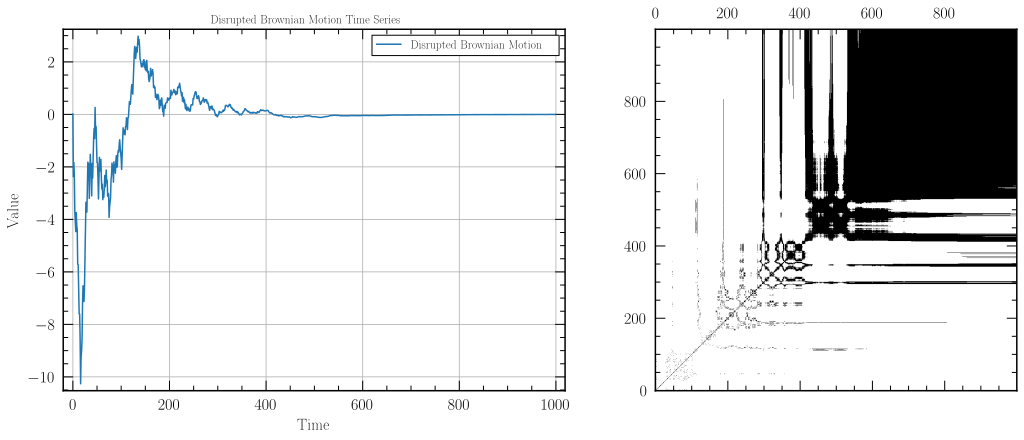

In [22]:
def generate_dbm_series(n, sigma, damping_factor):
    """
    Generate a time series using Disrupted Brownian Motion (DBM).
    
    Parameters:
        n (int): The number of samples.
        sigma (float): The standard deviation of the Brownian increments.
        damping_factor (float): The factor by which the motion is damped over time.
        
    Returns:
        np.array: The generated DBM time series.
    """
    # Generate standard Brownian motion (random walk)
    increments = np.random.normal(0, sigma, n)
    brownian_motion = np.cumsum(increments)
    
    # Apply exponential damping
    time = np.arange(n)
    damping = np.exp(-damping_factor * time)
    disrupted_brownian_motion = brownian_motion * damping
    
    return disrupted_brownian_motion

# Example usage:
n = 1000  # Number of time steps
sigma = 1  # Standard deviation of the Brownian increments
damping_factor = 0.01  # Damping factor

dbm_series = generate_dbm_series(n, sigma, damping_factor)

# Plotting
import matplotlib.pyplot as plt
fig, (ax, ax2) = plt.subplots(figsize=(19, 6), ncols=2, layout='compressed')
ax.plot(dbm_series, label='Disrupted Brownian Motion')
ax.set_title('Disrupted Brownian Motion Time Series')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend()
ax.grid(True)
from pyunicorn.timeseries import RecurrencePlot
rp = RecurrencePlot(dbm_series, metric='euclidean', recurrence_rate=0.3, silence_level=2)
ax2.matshow(rp.recurrence_matrix(), origin='lower', cmap='Greys', interpolation='none')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


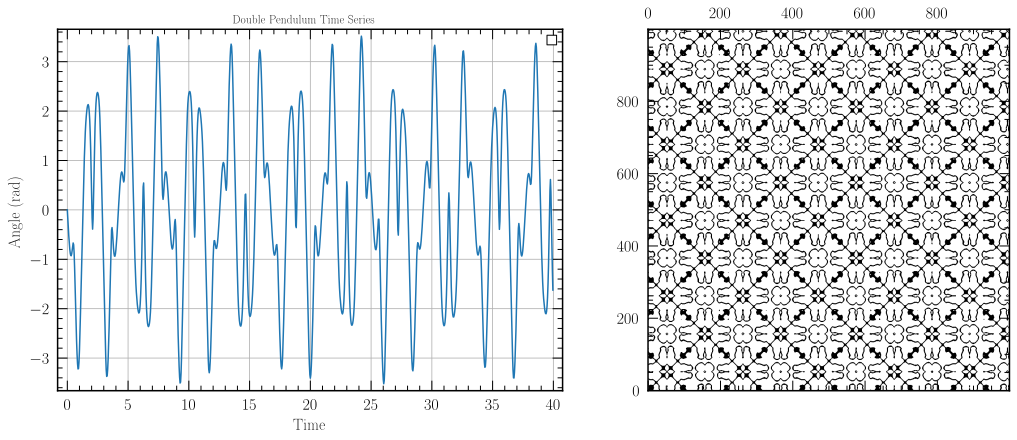

In [24]:
def double_pendulum_deriv(y, t, L1, L2, m1, m2, g):
    """
    Compute the derivatives for the double pendulum system.
    
    Parameters:
        y (array): An array containing the current state of the system [theta1, z1, theta2, z2].
        t (float): The current time.
        L1 (float): Length of the first pendulum.
        L2 (float): Length of the second pendulum.
        m1 (float): Mass of the first pendulum.
        m2 (float): Mass of the second pendulum.
        g (float): Gravitational acceleration.
        
    Returns:
        np.array: Derivatives [dtheta1/dt, dz1/dt, dtheta2/dt, dz2/dt].
    """
    theta1, z1, theta2, z2 = y
    
    c, s = np.cos(theta1-theta2), np.sin(theta1-theta2)
    
    theta1_dot = z1
    z1_dot = (m2*g*np.sin(theta2)*c - m2*s*(L1*z1**2*c + L2*z2**2) -
              (m1+m2)*g*np.sin(theta1)) / L1 / (m1 + m2*s**2)
    
    theta2_dot = z2
    z2_dot = ((m1+m2)*(L1*z1**2*s - g*np.sin(theta2) + g*np.sin(theta1)*c) + 
              m2*L2*z2**2*s*c) / L2 / (m1 + m2*s**2)
    
    return theta1_dot, z1_dot, theta2_dot, z2_dot

def generate_double_pendulum_series(n, dt, L1, L2, m1, m2, g, initial_state):
    """
    Generate a time series for the double pendulum system.
    
    Parameters:
        n (int): The number of time steps.
        dt (float): The time step size.
        L1 (float): Length of the first pendulum.
        L2 (float): Length of the second pendulum.
        m1 (float): Mass of the first pendulum.
        m2 (float): Mass of the second pendulum.
        g (float): Gravitational acceleration.
        initial_state (list): Initial state [theta1, z1, theta2, z2].
        
    Returns:
        np.array: The generated time series for the double pendulum.
    """
    t = np.linspace(0, n*dt, n)
    solution = odeint(double_pendulum_deriv, initial_state, t, args=(L1, L2, m1, m2, g))
    return solution

# Example usage:
n = 1000  # Number of time steps
dt = 0.04  # Time step size
L1, L2 = 1.0, 1.0  # Lengths of the pendulums
m1, m2 = 1.0, 1.0  # Masses of the pendulums
g = 9.81  # Gravitational acceleration
initial_state = [np.pi/4, 0, np.pi/2, 0]  # Initial state

solution = generate_double_pendulum_series(n, dt, L1, L2, m1, m2, g, initial_state)

# plt.plot(dt*np.arange(n), solution[:, 0], label='Theta1')
# plt.plot(dt*np.arange(n), solution[:, 2], label='Theta2')

# Plotting
fig, (ax, ax2) = plt.subplots(figsize=(19, 6), ncols=2, layout='compressed')
ax.plot(dt*np.arange(n), solution[:, 1])
ax.set_title('Double Pendulum Time Series')
ax.set_xlabel('Time')
ax.set_ylabel('Angle (rad)')
ax.legend()
ax.grid(True)
from pyunicorn.timeseries import RecurrencePlot
rp = RecurrencePlot(solution[:, 1], metric='euclidean', recurrence_rate=0.2, silence_level=2)
ax2.matshow(rp.recurrence_matrix(), origin='lower', cmap='Greys', interpolation='none')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


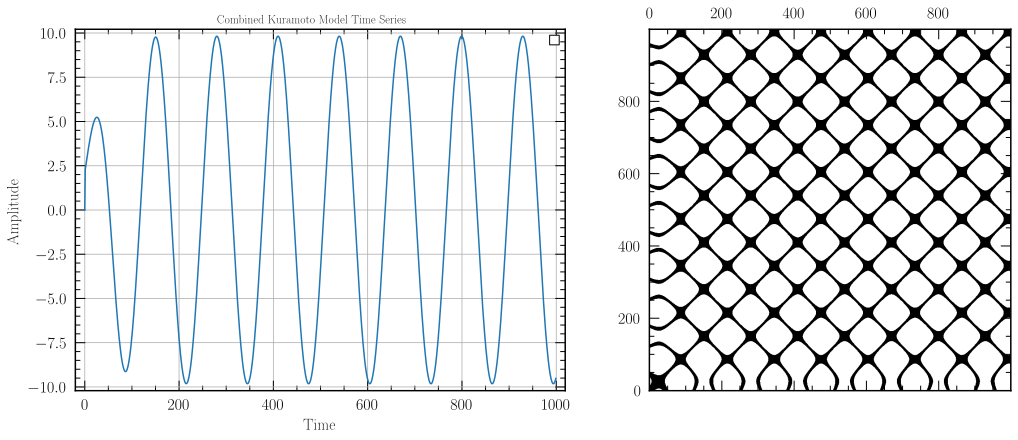

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def kuramoto_model_combined(n, dt, frequencies, coupling_constant, initial_phases):
    num_oscillators = len(frequencies)
    phases = np.zeros((n, num_oscillators))
    combined_series = np.zeros(n)
    phases[0] = initial_phases
    
    for t in range(1, n):
        for i in range(num_oscillators):
            interactions = np.sin(phases[t-1] - phases[t-1][i])
            phases[t, i] = phases[t-1, i] + (frequencies[i] + coupling_constant / num_oscillators * np.sum(interactions)) * dt
        combined_series[t] = np.sum(np.sin(phases[t]))  # Sum of sinusoids
    
    return combined_series

# Example usage
n = 1000
dt = 0.05
frequencies = np.random.normal(1.0, 0.1, 10)
coupling_constant = 0.5
initial_phases = np.random.uniform(0, 2*np.pi, 10)

combined_series = kuramoto_model_combined(n, dt, frequencies, coupling_constant, initial_phases)

# Plotting
fig, (ax, ax2) = plt.subplots(figsize=(18.5, 6), ncols=2, layout='compressed')
ax.plot(combined_series)
ax.set_title('Combined Kuramoto Model Time Series')
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
ax.legend()
ax.grid(True)
from pyunicorn.timeseries import RecurrencePlot
rp = RecurrencePlot(combined_series, metric='euclidean', recurrence_rate=0.2, silence_level=2)
ax2.matshow(rp.recurrence_matrix(), origin='lower', cmap='Greys', interpolation='none')
plt.show()

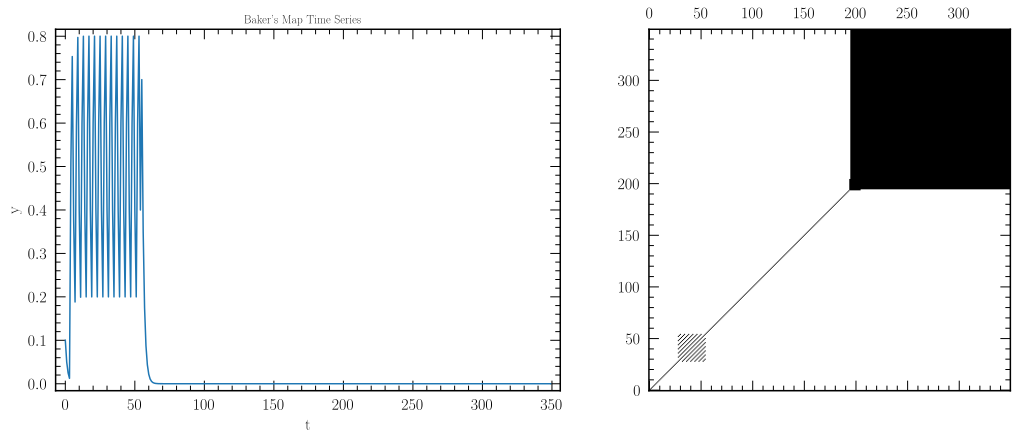

In [30]:
def bakers_map(n, x0, y0):
    """
    Generate a time series using the Baker's Map.
    
    Parameters:
        n (int): The number of iterations.
        x0 (float): The initial x-coordinate, 0 <= x0 < 1.
        y0 (float): The initial y-coordinate, 0 <= y0 < 1.
        
    Returns:
        np.array: Arrays of x and y coordinates representing the Baker's Map time series.
    """
    x = np.zeros(n)
    y = np.zeros(n)
    x[0], y[0] = x0, y0
    
    for i in range(1, n):
        if x[i-1] < 0.5:
            x[i] = 2 * x[i-1]
            y[i] = 0.5 * y[i-1]
        else:
            x[i] = 2 * x[i-1] - 1
            y[i] = 0.5 * y[i-1] + 0.5
            
    return x, y

# Example usage:
n = 350  # Number of iterations
x0, y0 = 0.1, 0.1  # Initial coordinates
x_series, y_series = bakers_map(n, x0, y0)

# Plotting
import matplotlib.pyplot as plt
fig, (ax, ax2) = plt.subplots(figsize=(19, 6), ncols=2, layout='compressed')
# plt.plot(x_series, y_series, 'o', markersize=2)
ax.plot(y_series)
ax.set_title('Baker\'s Map Time Series')
ax.set_xlabel('t')
ax.set_ylabel('y')
from pyunicorn.timeseries import RecurrencePlot
rp = RecurrencePlot(y_series, metric='euclidean', recurrence_rate=0.2, silence_level=2)
ax2.matshow(rp.recurrence_matrix(), origin='lower', cmap='Greys', interpolation='none')
plt.show()


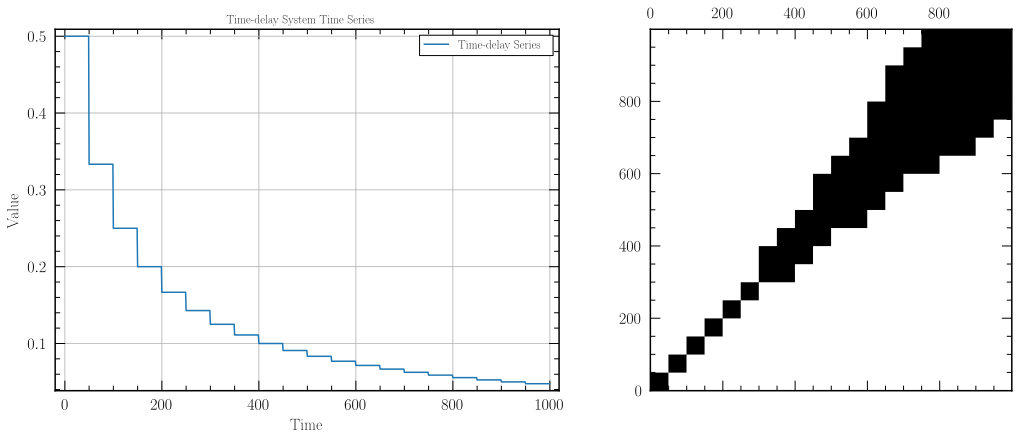

In [32]:
def generate_time_delay_series(n, delay, initial_value=0.5, k=1.0):
    """
    Generate a Time-delay system time series.
    
    Parameters:
        n (int): The number of samples.
        delay (int): The delay parameter.
        initial_value (float): Initial value of the time series.
        k (float): Control parameter.
        
    Returns:
        np.array: The generated Time-delay system time series.
    """
    series = np.zeros(n)
    series[:delay] = initial_value  # Set initial values
    
    for i in range(delay, n):
        series[i] = series[i-delay] / (1 + series[i-delay]**k)
    
    return series

# Example usage
n = 1000
delay = 50
initial_value = 0.5
k = 1.0
time_delay_series = generate_time_delay_series(n, delay, initial_value, k)

# Plotting
fig, (ax, ax2) = plt.subplots(figsize=(19, 6), ncols=2, layout='compressed')
ax.plot(time_delay_series, label='Time-delay Series')
ax.set_title('Time-delay System Time Series')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend()
ax.grid(True)
from pyunicorn.timeseries import RecurrencePlot
rp = RecurrencePlot(time_delay_series, metric='euclidean', recurrence_rate=0.2, silence_level=2)
ax2.matshow(rp.recurrence_matrix(), origin='lower', cmap='Greys', interpolation='none')
plt.show()


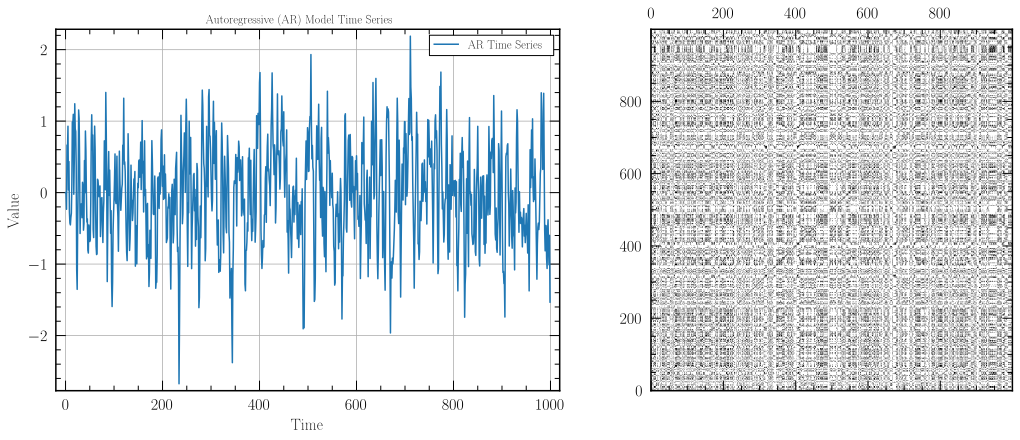

In [33]:
def generate_AR_series(n, coeffs, sigma):
    ar_order = len(coeffs)
    series = np.zeros(n)
    noise = np.random.normal(0, sigma, n)
    
    for i in range(ar_order, n):
        series[i] = np.dot(coeffs, series[i-ar_order:i][::-1]) + noise[i]
        
    return series

# Example usage
n = 1000
coeffs = [0.8, -0.2]
sigma = 0.5
ar_series = generate_AR_series(n, coeffs, sigma)

# Plotting
fig, (ax, ax2) = plt.subplots(figsize=(19, 6), ncols=2, layout='compressed')
ax.plot(ar_series, label='AR Time Series')
ax.set_title('Autoregressive (AR) Model Time Series')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend()
ax.grid(True)
from pyunicorn.timeseries import RecurrencePlot
rp = RecurrencePlot(ar_series, metric='euclidean', recurrence_rate=0.2, silence_level=2)
ax2.matshow(rp.recurrence_matrix(), origin='lower', cmap='Greys', interpolation='none')
plt.show()


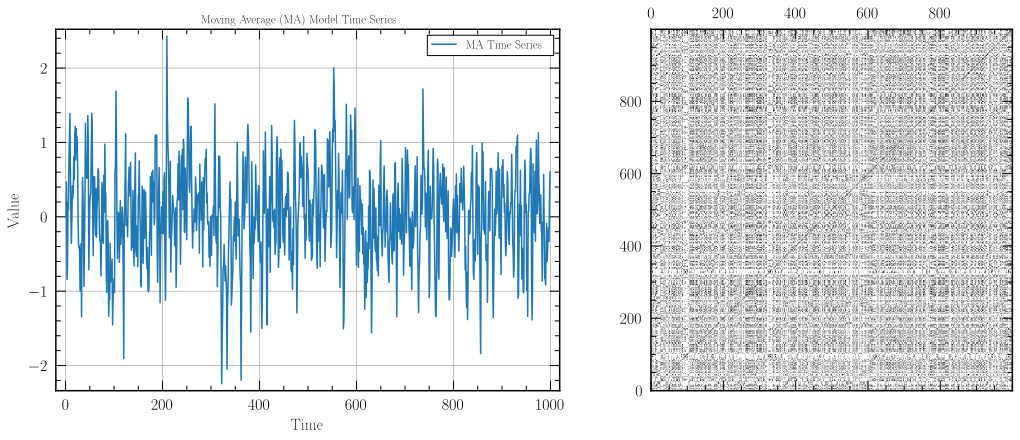

In [34]:
def generate_MA_series(n, coeffs, sigma):
    ma_order = len(coeffs)
    series = np.zeros(n)
    noise = np.random.normal(0, sigma, n)
    
    for i in range(ma_order, n):
        series[i] = np.dot(coeffs, noise[i-ma_order:i][::-1]) + noise[i]
        
    return series

# Example usage
n = 1000
coeffs = [0.6, 0.3]
sigma = 0.5
ma_series = generate_MA_series(n, coeffs, sigma)

# Plotting
fig, (ax, ax2) = plt.subplots(figsize=(19, 6), ncols=2, layout='compressed')
ax.plot(ma_series, label='MA Time Series')
ax.set_title('Moving Average (MA) Model Time Series')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend()
ax.grid(True)
from pyunicorn.timeseries import RecurrencePlot
rp = RecurrencePlot(ma_series, metric='euclidean', recurrence_rate=0.2, silence_level=2)
ax2.matshow(rp.recurrence_matrix(), origin='lower', cmap='Greys', interpolation='none')
plt.show()


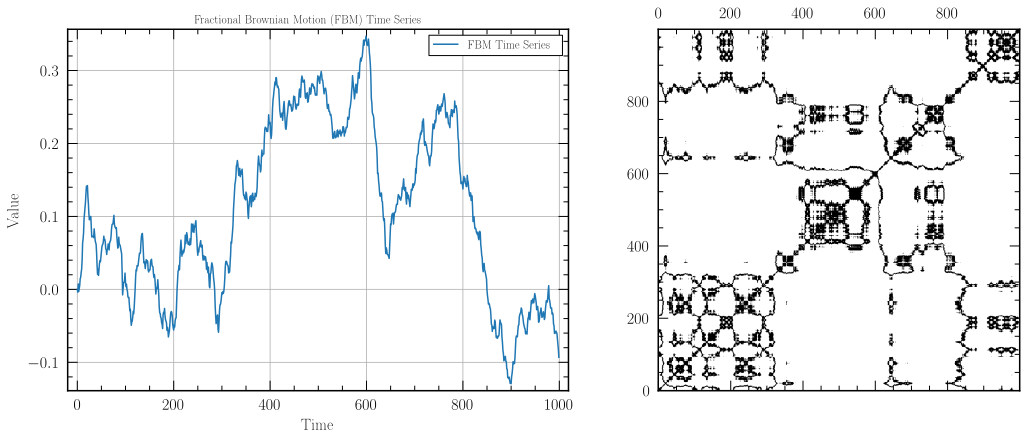

In [36]:
from fbm import FBM

def generate_fbm_series(n, hurst):
    f = FBM(n=n-1, hurst=hurst, length=1, method='daviesharte')
    fbm_series = f.fbm()
    return fbm_series

# Example usage
n = 1000
hurst = 0.7
fbm_series = generate_fbm_series(n, hurst)

# Plotting
fig, (ax, ax2) = plt.subplots(figsize=(19, 6), ncols=2, layout='compressed')
ax.plot(fbm_series, label='FBM Time Series')
ax.set_title('Fractional Brownian Motion (FBM) Time Series')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend()
ax.grid(True)
from pyunicorn.timeseries import RecurrencePlot
rp = RecurrencePlot(fbm_series, metric='euclidean', recurrence_rate=0.1, silence_level=2)
ax2.matshow(rp.recurrence_matrix(), origin='lower', cmap='Greys', interpolation='none')
plt.show()


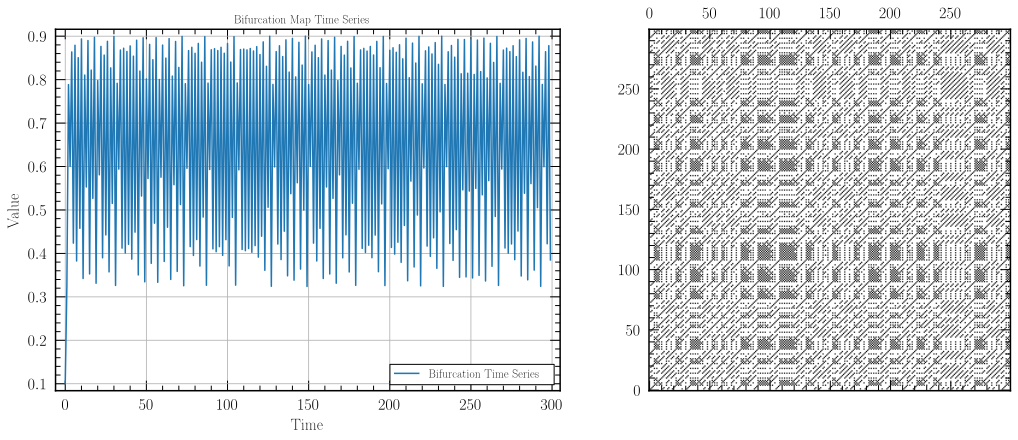

In [39]:
def generate_bifurcation_series(n, r):
    series = np.zeros(n)
    series[0] = 0.1
    for i in range(1, n):
        series[i] = r * series[i-1] * (1 - series[i-1])
    return series

# Example usage
n = 300
r = 3.6
bifurcation_series = generate_bifurcation_series(n, r)

# Plotting
fig, (ax, ax2) = plt.subplots(figsize=(19, 6), ncols=2, layout='compressed')
ax.plot(bifurcation_series, label='Bifurcation Time Series')
ax.set_title('Bifurcation Map Time Series')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend()
ax.grid(True)
from pyunicorn.timeseries import RecurrencePlot
rp = RecurrencePlot(bifurcation_series, metric='euclidean', recurrence_rate=0.2, silence_level=2)
ax2.matshow(rp.recurrence_matrix(), origin='lower', cmap='Greys', interpolation='none')
plt.show()


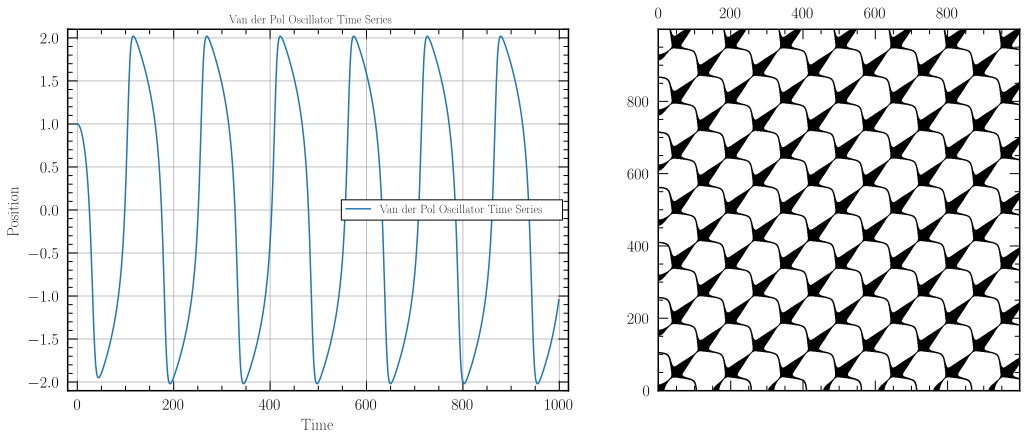

In [40]:
def vdp_oscillator(y, t, mu):
    y1, y2 = y
    dydt = [y2, mu*(1 - y1**2)*y2 - y1]
    return dydt

def generate_vdp_series(n, mu, dt=0.01):
    t = np.linspace(0, n*dt, n)
    y0 = [1.0, 0.0]
    sol = odeint(vdp_oscillator, y0, t, args=(mu,))
    return sol[:, 0]

# Example usage
n = 1000
mu = 2.0
dt = 0.05
vdp_series = generate_vdp_series(n, mu, dt)

# Plotting
fig, (ax, ax2) = plt.subplots(figsize=(19, 6), ncols=2, layout='compressed')
ax.plot(vdp_series, label='Van der Pol Oscillator Time Series')
ax.set_title('Van der Pol Oscillator Time Series')
ax.set_xlabel('Time')
ax.set_ylabel('Position')
ax.legend()
ax.grid(True)
from pyunicorn.timeseries import RecurrencePlot
rp = RecurrencePlot(vdp_series, metric='euclidean', recurrence_rate=0.2, silence_level=2)
ax2.matshow(rp.recurrence_matrix(), origin='lower', cmap='Greys', interpolation='none')
plt.show()


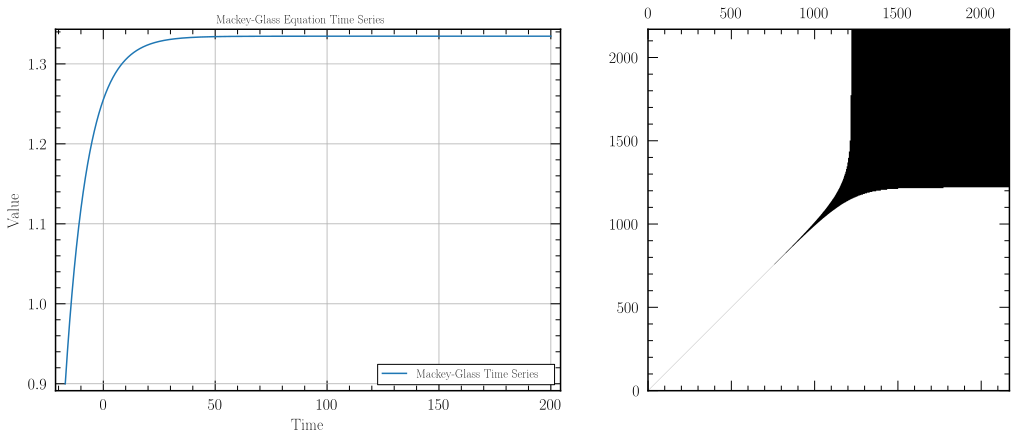

In [41]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def mackey_glass(y, t, beta, gamma, n, tau, y_history, t_history):
    if t <= t_history[0]:
        return gamma * y  # Assuming a stable non-zero initial state

    y_t = np.interp(t - tau, t_history, y_history)
    dydt = beta * y_t / (1 + y_t**n) - gamma * y
    return dydt

def generate_mackey_glass_series(n, beta, gamma, n_nonlinearity, tau, dt=0.1):
    t_start = -tau if tau > 0 else 0
    t_initial = np.arange(t_start, 0, dt)
    y_initial = 0.9 * np.ones_like(t_initial)
    t_later = np.linspace(0, n*dt, n)
    t = np.concatenate([t_initial, t_later])
    y0 = [y_initial[-1]]
    
    sol = odeint(mackey_glass, y0, t, args=(beta, gamma, n_nonlinearity, tau, y_initial, t_initial))
    return t, sol[:, 0]

# Example usage
n = 2000
beta = 0.2
gamma = 0.1
n_nonlinearity = 10
tau = 17
dt = 0.1
t_series, mackey_glass_series = generate_mackey_glass_series(n, beta, gamma, n_nonlinearity, tau, dt)

# Plotting
fig, (ax, ax2) = plt.subplots(figsize=(19, 6), ncols=2, layout='compressed')
ax.plot(t_series, mackey_glass_series, label='Mackey-Glass Time Series')
ax.set_title('Mackey-Glass Equation Time Series')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend()
ax.grid(True)
from pyunicorn.timeseries import RecurrencePlot
rp = RecurrencePlot(mackey_glass_series, metric='euclidean', recurrence_rate=0.2, silence_level=2)
ax2.matshow(rp.recurrence_matrix(), origin='lower', cmap='Greys', interpolation='none')
plt.show()


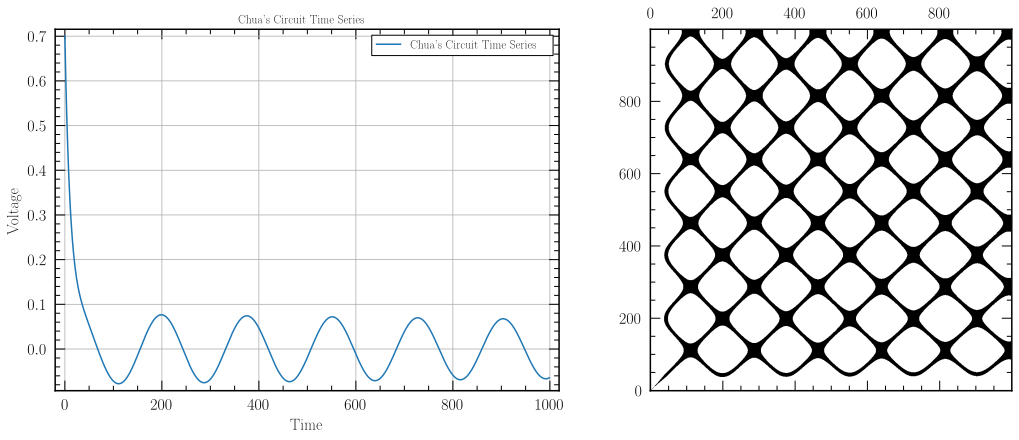

In [42]:
def chua_circuit(y, t, alpha, beta, m0, m1):
    x, y, z = y
    dxdt = alpha * (y - x - ((m1 * x + 0.5 * (m0 - m1) * (abs(x+1) - abs(x-1)))))
    dydt = x - y + z
    dzdt = -beta * y
    return [dxdt, dydt, dzdt]

def generate_chua_circuit_series(n, alpha, beta, m0, m1, dt=0.01):
    t = np.linspace(0, n*dt, n)
    y0 = [0.7, 0, 0]
    sol = odeint(chua_circuit, y0, t, args=(alpha, beta, m0, m1))
    return sol[:, 0]

# Example usage
n = 1000
alpha = 9.0
beta = 14.286
m0 = -1.0/7.0
m1 = 2.0/7.0
dt = 0.01
chua_circuit_series = generate_chua_circuit_series(n, alpha, beta, m0, m1, dt)

# Plotting
fig, (ax, ax2) = plt.subplots(figsize=(19, 6), ncols=2, layout='compressed')
ax.plot(chua_circuit_series, label='Chua\'s Circuit Time Series')
ax.set_title('Chua\'s Circuit Time Series')
ax.set_xlabel('Time')
ax.set_ylabel('Voltage')
ax.legend()
ax.grid(True)
from pyunicorn.timeseries import RecurrencePlot
rp = RecurrencePlot(chua_circuit_series, metric='euclidean', recurrence_rate=0.2, silence_level=2)
ax2.matshow(rp.recurrence_matrix(), origin='lower', cmap='Greys', interpolation='none')
plt.show()

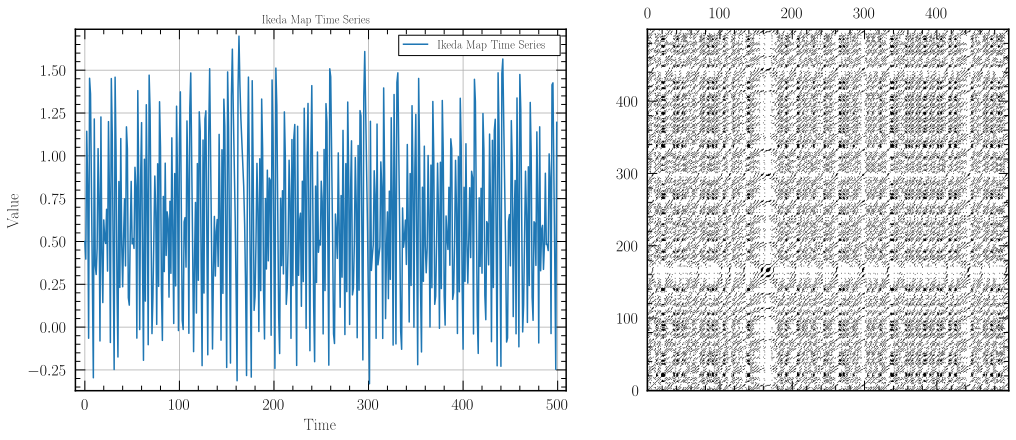

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def ikeda_map(u, k, a, b):
    x, y = u
    t = k - a / (1 + x**2 + y**2)
    x_next = 1 + b * (x * np.cos(t) - y * np.sin(t))
    y_next = b * (x * np.sin(t) + y * np.cos(t))
    return np.array([x_next, y_next])

def generate_ikeda_series(n, k, a, b):
    series = np.zeros((n, 2))
    series[0] = [0.5, 0.5]  # Initial condition in the complex plane
    for i in range(1, n):
        series[i] = ikeda_map(series[i-1], k, a, b)
    return series

# Example usage
n = 500
k = 0.4
a = 6.0
b = 0.9  # b is usually less than 1 for the Ikeda map
ikeda_series = generate_ikeda_series(n, k, a, b)

# Plotting the Ikeda series
# We only plot the 'x' component for simplicity
fig, (ax, ax2) = plt.subplots(figsize=(18.5, 6), ncols=2, layout='compressed')
ax.plot(ikeda_series[:, 0], label='Ikeda Map Time Series')
ax.set_title('Ikeda Map Time Series')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend()
ax.grid(True)
from pyunicorn.timeseries import RecurrencePlot
rp = RecurrencePlot(ikeda_series, metric='euclidean', recurrence_rate=0.2, silence_level=2)
ax2.matshow(rp.recurrence_matrix(), origin='lower', cmap='Greys', interpolation='none')
plt.show()


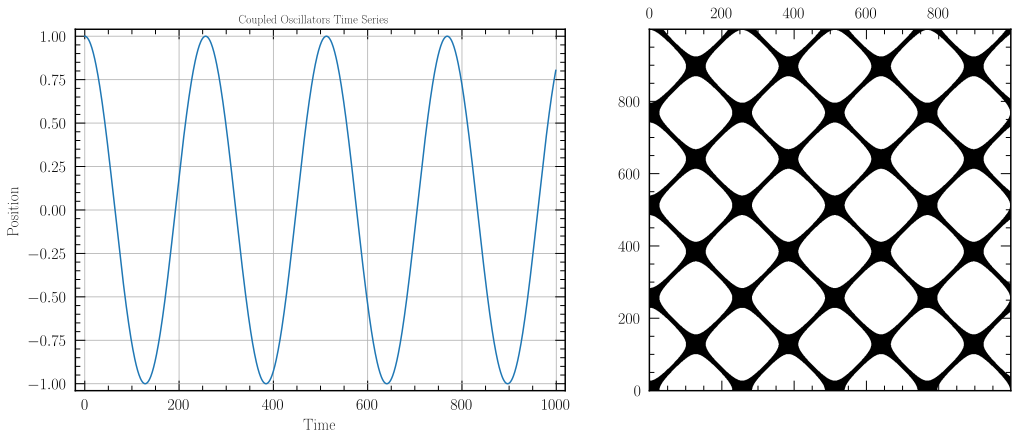

In [48]:
from scipy.integrate import odeint

def coupled_oscillators(y, t, k, m):
    x1, v1, x2, v2 = y
    dx1dt = v1
    dv1dt = (-k * x1 + k * (x2 - x1)) / m
    dx2dt = v2
    dv2dt = (-k * x2 + k * (x1 - x2)) / m
    return [dx1dt, dv1dt, dx2dt, dv2dt]

def generate_coupled_oscillators_series(n, k, m, dt=0.01):
    t = np.linspace(0, n*dt, n)
    y0 = [1.0, 0.0, -1.0, 0.0]
    sol = odeint(coupled_oscillators, y0, t, args=(k, m))
    return sol[:, 0]

# Example usage
n = 1000
k = 2.0
m = 1.0
dt = 0.01
coupled_oscillators_series = generate_coupled_oscillators_series(n, k, m, dt)

# Plotting
fig, (ax, ax2) = plt.subplots(figsize=(18.5, 6), ncols=2, layout='compressed')
ax.plot(coupled_oscillators_series, label='Coupled Oscillators Series')
ax.set_title('Coupled Oscillators Time Series')
ax.set_xlabel('Time')
ax.set_ylabel('Position')
# ax.legend()
ax.grid(True)
from pyunicorn.timeseries import RecurrencePlot
rp = RecurrencePlot(coupled_oscillators_series, metric='euclidean', recurrence_rate=0.2, silence_level=2)
ax2.matshow(rp.recurrence_matrix(), origin='lower', cmap='Greys', interpolation='none')
plt.show()


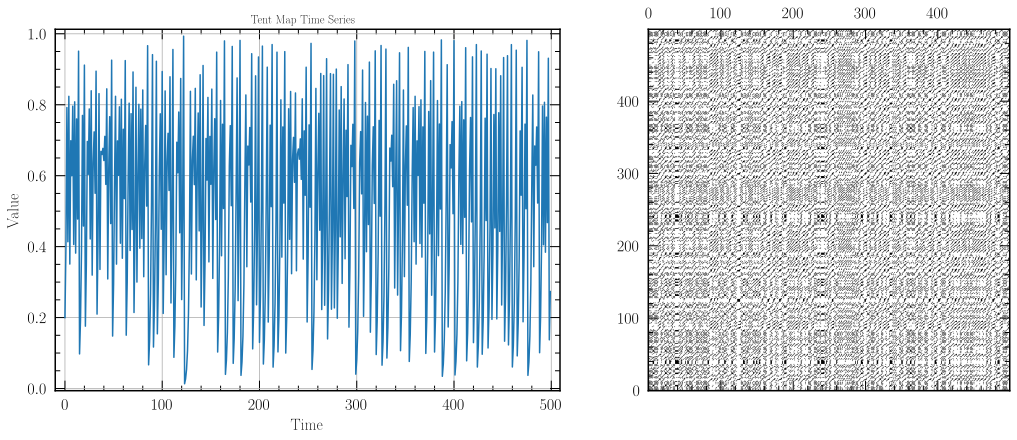

In [50]:
def tent_map(x, mu):
    if x < 0.5:
        return mu * x
    else:
        return mu * (1 - x)

def generate_tent_map_series(n, mu):
    series = np.zeros(n)
    series[0] = 0.2  # Initial value
    for i in range(1, n):
        series[i] = tent_map(series[i-1], mu)
    return series

# Example usage
n = 500
mu = 1.99
tent_map_series = generate_tent_map_series(n, mu)

# Plotting
fig, (ax, ax2) = plt.subplots(figsize=(19, 6), ncols=2, layout='compressed')
ax.plot(tent_map_series, label='Tent Map Time Series')
ax.set_title('Tent Map Time Series')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
# ax.legend()
ax.grid(True)
from pyunicorn.timeseries import RecurrencePlot
rp = RecurrencePlot(tent_map_series, metric='euclidean', recurrence_rate=0.2, silence_level=2)
ax2.matshow(rp.recurrence_matrix(), origin='lower', cmap='Greys', interpolation='none')
plt.show()


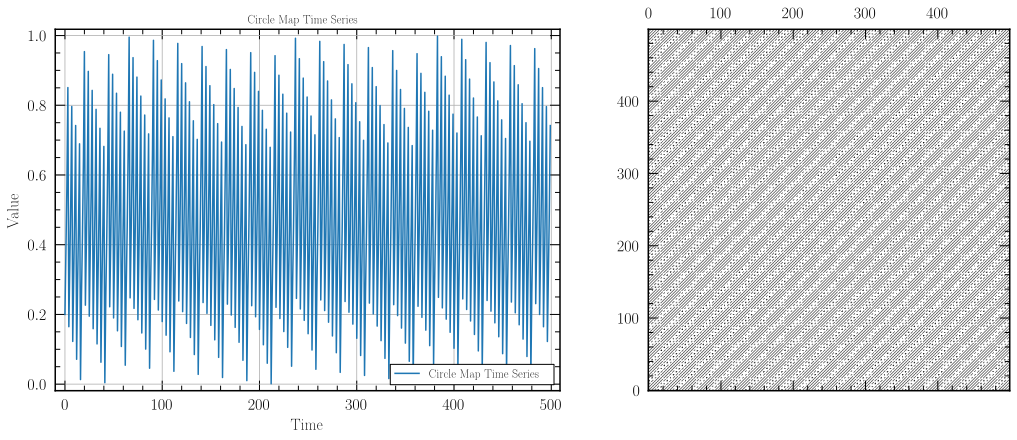

In [51]:
def circle_map(theta, k, omega):
    return (theta + omega - (k / (2 * np.pi)) * np.sin(2 * np.pi * theta)) % 1

def generate_circle_map_series(n, k, omega):
    series = np.zeros(n)
    series[0] = 0.2  # Initial value
    for i in range(1, n):
        series[i] = circle_map(series[i-1], k, omega)
    return series

# Example usage
n = 500
k = 0.5  # This should not be too large to avoid over-dense behavior
omega = 0.25  # A rational multiple of 2*pi to show clear periodic or quasi-periodic behavior
circle_map_series = generate_circle_map_series(n, k, omega)

# Plotting
fig, (ax, ax2) = plt.subplots(figsize=(19, 6), ncols=2, layout='compressed')
ax.plot(circle_map_series, label='Circle Map Time Series')
ax.set_title('Circle Map Time Series')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend()
ax.grid(True)
from pyunicorn.timeseries import RecurrencePlot
rp = RecurrencePlot(circle_map_series, metric='euclidean', recurrence_rate=0.2, silence_level=2)
ax2.matshow(rp.recurrence_matrix(), origin='lower', cmap='Greys', interpolation='none')
plt.show()



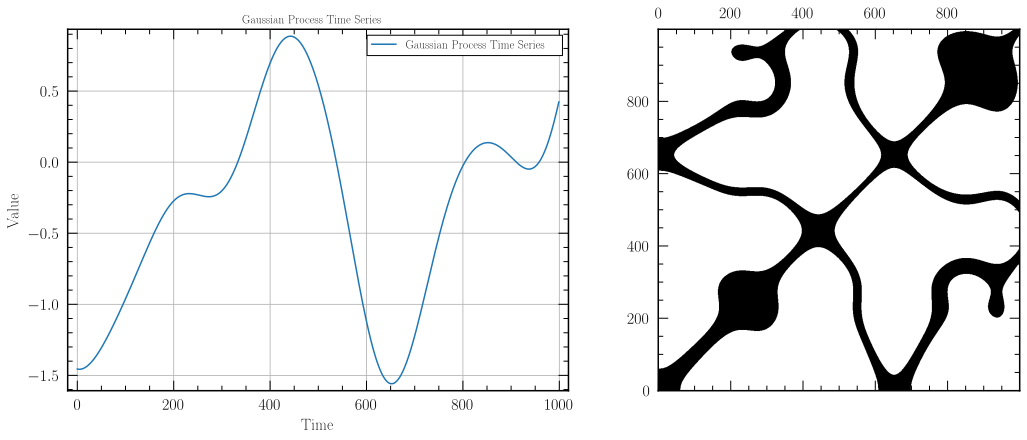

In [52]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

def generate_gaussian_process_series(n, length_scale=1.0, noise_level=0.1):
    X = np.atleast_2d(np.linspace(0, 10, n)).T
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale, (1e-2, 1e2))
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=noise_level**2)
    y = gp.sample_y(X, random_state=42).flatten()
    return y

# Example usage
n = 1000
gp_series = generate_gaussian_process_series(n)

# Plotting
fig, (ax, ax2) = plt.subplots(figsize=(19, 6), ncols=2, layout='compressed')
ax.plot(gp_series, label='Gaussian Process Time Series')
ax.set_title('Gaussian Process Time Series')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend()
ax.grid(True)
from pyunicorn.timeseries import RecurrencePlot
rp = RecurrencePlot(gp_series, metric='euclidean', recurrence_rate=0.2, silence_level=2)
ax2.matshow(rp.recurrence_matrix(), origin='lower', cmap='Greys', interpolation='none')
plt.show()


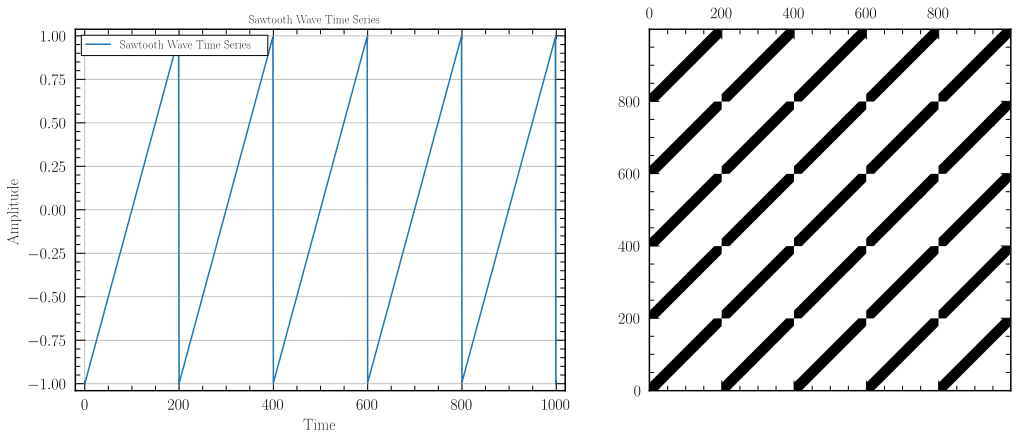

In [55]:
from scipy.signal import sawtooth

def generate_sawtooth_wave(n):
    t = np.linspace(0, 1, n)
    return sawtooth(2 * np.pi * 5 * t)

# Example usage
n = 1000
sawtooth_series = generate_sawtooth_wave(n)

# Plotting
fig, (ax, ax2) = plt.subplots(figsize=(18.5, 6), ncols=2, layout='compressed')
ax.plot(sawtooth_series, label='Sawtooth Wave Time Series')
ax.set_title('Sawtooth Wave Time Series')
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
ax.legend()
ax.grid(True)
from pyunicorn.timeseries import RecurrencePlot
rp = RecurrencePlot(sawtooth_series, metric='euclidean', recurrence_rate=0.2, silence_level=2)
ax2.matshow(rp.recurrence_matrix(), origin='lower', cmap='Greys', interpolation='none')
plt.show()


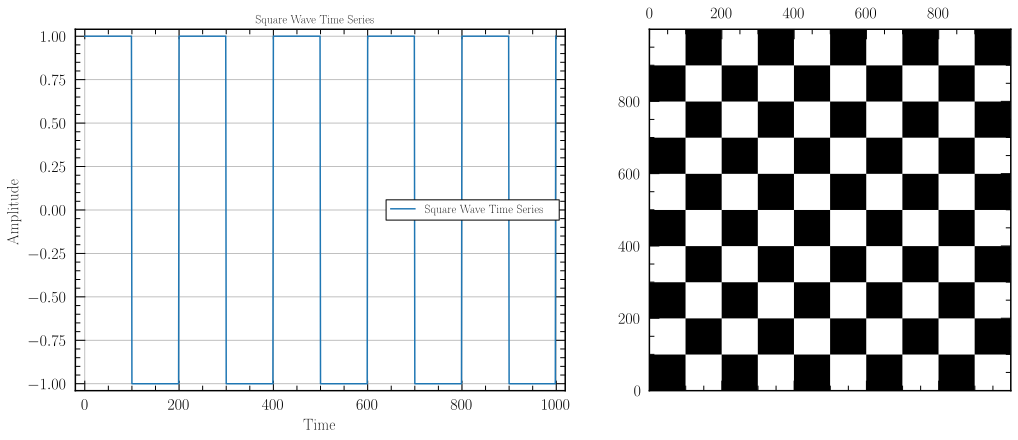

In [59]:
from scipy.signal import square

def generate_square_wave(n):
    t = np.linspace(0, 1, n)
    return square(2 * np.pi * 5 * t)

# Example usage
n = 1000
square_series = generate_square_wave(n)

# Plotting
fig, (ax, ax2) = plt.subplots(figsize=(18.5, 6), ncols=2, layout='compressed')
ax.plot(square_series, label='Square Wave Time Series')
ax.set_title('Square Wave Time Series')
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
ax.legend()
ax.grid(True)
from pyunicorn.timeseries import RecurrencePlot
rp = RecurrencePlot(square_series, metric='euclidean', recurrence_rate=0.8, silence_level=2)
ax2.matshow(rp.recurrence_matrix(), origin='lower', cmap='Greys', interpolation='none')
plt.show()


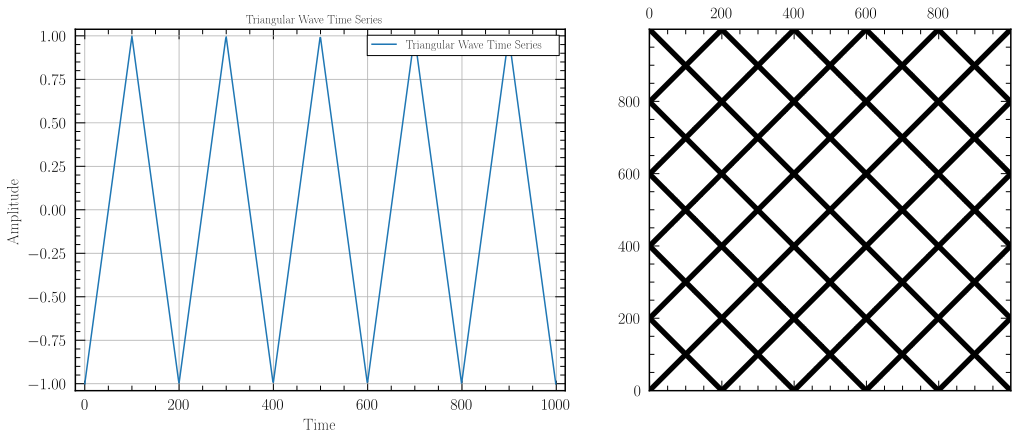

In [61]:
from scipy.signal import sawtooth

def generate_triangular_wave(n, width=0.5):
    t = np.linspace(0, 1, n)
    return sawtooth(2 * np.pi * 5 * t, width)

# Example usage
n = 1000
triangular_series = generate_triangular_wave(n)

# Plotting
fig, (ax, ax2) = plt.subplots(figsize=(18.5, 6), ncols=2, layout='compressed')
ax.plot(triangular_series, label='Triangular Wave Time Series')
ax.set_title('Triangular Wave Time Series')
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
ax.grid(True)
from pyunicorn.timeseries import RecurrencePlot
rp = RecurrencePlot(triangular_series, metric='euclidean', recurrence_rate=0.2, silence_level=2)
ax2.matshow(rp.recurrence_matrix(), origin='lower', cmap='Greys', interpolation='none')
plt.show()
